<img src ="https://daxg39y63pxwu.cloudfront.net/images/blog/loan-prediction-using-machine-learning-project-source-code/Loan_Prediction_using__Machine_Learning_Project.png"  width="670" height="400">

Bir finansal kurum, kredi başvurusu yapan müşterilerin borçlarını geri ödeme olasılıklarını belirlememize yardımcı olmamızı istemektedir. Şirket yönetimi, hangi müşterilerin iyi bir müşteri olacağını tanımlamak için bir tahmin modeli geliştirmemizi talep etmektedir. Ayrıca, modelin sonuçlarına dayanarak kredi başvurusunda bulunan müşterilere sorulacak soruları da önermemizi istemektedir.

In [423]:
import pandas as pd
pd.set_option("display.max_columns",100) #kaç adet sutun görmek istiyorsak (... lar olmadan)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [424]:
df= pd.read_csv('/content/LoansTrainingSet.csv')

## Data Understanding-EDA

In [425]:
df.sample()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
156406,9b8eb8fb-7248-4a4e-99ef-24511e773a80,2ecc4b36-e6ab-4cb4-bac0-46150b87577d,Fully Paid,8411,Short Term,725.0,NaN,Rent,24738.0,Debt Consolidation,$106.79,17.5,35.0,6,0,3202,8895,0.0,0.0


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [427]:
df.drop_duplicates(inplace=True)
#tekrarlanan satırları verimizden kaldırdık

In [428]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [429]:
df['Years of Credit History'].min()

3.4

In [430]:
df['Purpose']=df['Purpose'].str.replace('other','Other')

In [431]:
df['Loan Status']=df['Loan Status'].map({'Fully Paid':1,'Charged Off':0}).astype(int)

In [432]:
df['Current Loan Amount']=df['Current Loan Amount'].replace('99999999','nan',inplace=True)

In [433]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x: int(x) if pd.notna(x) and str(x).isdigit() else x)

In [434]:
df['Term']=df['Term'].map({'Short Term':0,'Long Term':1}).astype(int)

In [435]:
import re
df['Years in current job'] = df['Years in current job'].str.replace(r'[^0-9]', '', regex=True)

In [436]:
len(df['Years in current job'].unique())

11

In [437]:
df['Years in current job'] = df['Years in current job'].apply(lambda x: int(x) if pd.notna(x) and str(x).isdigit() else x)

In [438]:
df['Home Ownership'].value_counts()
#"HaveMortgage": Müşterinin herhangi bir ipoteği olup olmadığını sorar.
#"Home Mortgage": Belirli bir ev için kullanılan ipotekli krediyi ifade eder.

,count
Home Ownership,
Home Mortgage,117231
Rent,101209
Own Home,21389
HaveMortgage,545


In [439]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$','')

In [440]:
df.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,240374
Term,0
Credit Score,59346
Years in current job,10444
Home Ownership,0
Annual Income,59346
Purpose,0


# Feature engineering

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  int64  
 3   Current Loan Amount           0 non-null       object 
 4   Term                          240374 non-null  int64  
 5   Credit Score                  181028 non-null  float64
 6   Years in current job          229930 non-null  float64
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 181028 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  object 
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  108947 non-null  fl

In [448]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '').astype(float)


In [449]:
df['Maximum Open Credit'][df['Maximum Open Credit']=='#VALUE!']

,Maximum Open Credit
184662,#VALUE!
184663,#VALUE!
187512,#VALUE!
187513,#VALUE!


In [450]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].str.replace('#VALUE!', 'NaN').astype(float)

In [451]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean())

In [452]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [453]:
df.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,240374
Term,0
Credit Score,59346
Years in current job,10444
Home Ownership,0
Annual Income,59346
Purpose,0


In [454]:
df['Credit Score'].mean()

1236.274079147977

In [455]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())

In [456]:
df['Credit Score']=df['Credit Score'].astype(int)

In [457]:
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].mean()).astype(int)

In [458]:
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].mean()).astype(int)

In [459]:
df['Bankruptcies']=df['Bankruptcies'].fillna(0).astype(int)

In [460]:
df['Tax Liens']=df['Tax Liens'].fillna(0).astype(int)

In [461]:
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean()).astype(int)

In [462]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,1,None,0,1236,2,Rent,72400,Debt Consolidation,1706.58,19.9,34,16,0,43992,38174.544563,0,0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,1,None,0,737,10,Own Home,77186,Debt Consolidation,1376.47,19.1,47,9,0,1717,38174.544563,0,0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,0,None,0,7460,9,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82,8,0,3315,38174.544563,0,0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,0,None,0,746,9,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82,8,0,3315,38174.544563,0,0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,1,None,1,678,10,Home Mortgage,117480,Debt Consolidation,2525.82,18.0,11,10,0,28317,38174.544563,0,0


In [463]:
df=df.drop(['Loan ID','Customer ID','Current Loan Amount'],axis=1)

# Data visualization

In [464]:
import seaborn as sns

In [465]:
import plotly.express as px
fig = px.histogram(df, x='Loan Status', color_discrete_sequence=['red'])
fig.update_layout(title='Loan Status Count', xaxis_title='Loan Status', yaxis_title='Count')

fig.show()

In [466]:
# Heatmap oluşturma
fig = px.imshow(df.corr(numeric_only=True),
                 labels=dict(x="Columns", y="Rows", color="orange"),
                 title="Heatmap", width=1000,height=800)

# Grafiği göster
fig.show()

In [507]:
df['Credit Score']=df['Credit Score']**2

In [508]:
df['Term']=df['Term']**2

In [509]:
df.corr(numeric_only=True)

,Loan Status,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,-0.176470,-0.421503,0.007049,0.060519,-0.015184,0.035195,0.014540,-0.020385,-0.009106,0.008985,0.002569,0.001908,-0.012523
Term,-0.176470,1.000000,0.058724,0.067821,0.058525,0.148689,0.034617,-0.008880,0.078688,-0.020938,0.088753,0.004135,-0.022380,-0.003992
Credit Score,-0.421503,0.058724,1.000000,-0.002400,-0.035998,0.005018,-0.011937,-0.006200,0.007468,0.001804,-0.002959,-0.000900,-0.002310,0.004780
Years in current job,0.007049,0.067821,-0.002400,1.000000,0.066642,0.126641,0.206315,-0.003813,0.049346,0.037512,0.091602,-0.000169,0.039736,0.007369
Annual Income,0.060519,0.058525,-0.035998,0.066642,1.000000,0.411850,0.135312,-0.033830,0.127900,-0.013969,0.255486,0.008738,-0.041070,0.033567
Monthly Debt,-0.015184,0.148689,0.005018,0.126641,0.411850,1.000000,0.190501,-0.035070,0.412327,-0.054412,0.473149,0.005886,-0.078436,0.018954
Years of Credit History,0.035195,0.034617,-0.011937,0.206315,0.135312,0.190501,1.000000,-0.021237,0.128257,0.060891,0.200822,0.010733,0.061686,0.020491
Months since last delinquent,0.014540,-0.008880,-0.006200,-0.003813,-0.033830,-0.035070,-0.021237,1.000000,-0.021648,0.068010,-0.016532,-0.000619,0.078815,0.003580
Number of Open Accounts,-0.020385,0.078688,0.007468,0.049346,0.127900,0.412327,0.128257,-0.021648,1.000000,-0.014116,0.221339,0.005365,-0.022944,0.005909
Number of Credit Problems,-0.009106,-0.020938,0.001804,0.037512,-0.013969,-0.054412,0.060891,0.068010,-0.014116,1.000000,-0.104329,-0.002483,0.758588,0.583304


# **Modeling**

In [510]:
x=df.drop('Loan Status',axis=1)
y=df[['Loan Status']]

In [511]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Term                          240374 non-null  int64  
 1   Credit Score                  240374 non-null  int64  
 2   Years in current job          240374 non-null  int64  
 3   Home Ownership                240374 non-null  object 
 4   Annual Income                 240374 non-null  int64  
 5   Purpose                       240374 non-null  object 
 6   Monthly Debt                  240374 non-null  float64
 7   Years of Credit History       240374 non-null  float64
 8   Months since last delinquent  240374 non-null  int64  
 9   Number of Open Accounts       240374 non-null  int64  
 10  Number of Credit Problems     240374 non-null  int64  
 11  Current Credit Balance        240374 non-null  int64  
 12  Maximum Open Credit           240374 non-null  fl

In [512]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

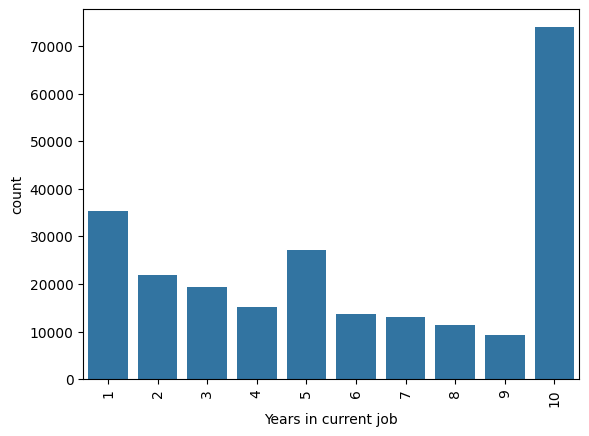

In [513]:
sns.countplot(x=x['Years in current job'])
plt.xticks(rotation=90);

In [514]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Term                          240374 non-null  int64  
 1   Credit Score                  240374 non-null  int64  
 2   Years in current job          240374 non-null  int64  
 3   Home Ownership                240374 non-null  object 
 4   Annual Income                 240374 non-null  int64  
 5   Purpose                       240374 non-null  object 
 6   Monthly Debt                  240374 non-null  float64
 7   Years of Credit History       240374 non-null  float64
 8   Months since last delinquent  240374 non-null  int64  
 9   Number of Open Accounts       240374 non-null  int64  
 10  Number of Credit Problems     240374 non-null  int64  
 11  Current Credit Balance        240374 non-null  int64  
 12  Maximum Open Credit           240374 non-null  fl

In [515]:
x=pd.get_dummies(x,drop_first=True)

In [563]:
from sklearn.model_selection import train_test_split

In [564]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [565]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [566]:
g=GaussianNB()
b=BernoulliNB()

In [567]:
g.fit(x_train,y_train)

GaussianNB()

In [568]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [569]:
gtahmin=g.predict(x_test)

In [570]:
accuracy_score(gtahmin,y_test)

0.7807800312012481

In [571]:
confusion_matrix(gtahmin,y_test)

array([[ 3104,   855],
       [ 9684, 34432]])

In [572]:
import seaborn as sns

<Axes: >

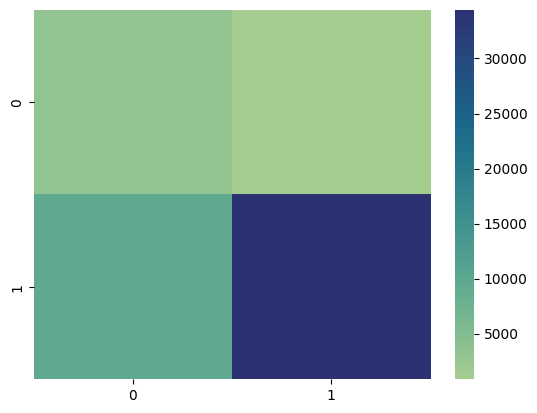

In [573]:
sns.heatmap(confusion_matrix(gtahmin,y_test),cmap='crest')

In [574]:
b.fit(x_train,y_train)

BernoulliNB()

In [575]:

btahmin=b.predict(x_test)

In [576]:
accuracy_score(btahmin,y_test)

0.7934685387415497

In [577]:
confusion_matrix(btahmin,y_test)
#a1veb2 sutunun başarılı a2 ve b2 nin de düşük olmasını istiyoruz

array([[ 2880,    21],
       [ 9908, 35266]])

In [578]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [579]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [581]:
gbctahmin=gbc.predict(x_test)

In [582]:
accuracy_score(gbctahmin,y_test)

0.7949453978159127

In [583]:
confusion_matrix(gbctahmin,y_test)

array([[ 3127,   197],
       [ 9661, 35090]])

In [584]:
from sklearn.preprocessing import normalize,scale
x=scale(x)

In [555]:
import tensorflow  as tf
from keras.models import Sequential
from keras.layers import Dense

In [556]:
#activasyon kodu güvnlik görevlisi gibi düşünebilrsin
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))#evet hayır çıkması için 1 vermek zorundayız
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [558]:
history=model.fit(x,y,epochs=50,batch_size=32,validation_split=.20,verbose=1)


Epoch 1/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7915 - loss: 0.5009 - val_accuracy: 0.7972 - val_loss: 0.4812
Epoch 2/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7905 - loss: 0.4874 - val_accuracy: 0.7977 - val_loss: 0.4743
Epoch 3/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7928 - loss: 0.4791 - val_accuracy: 0.7975 - val_loss: 0.4735
Epoch 4/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7925 - loss: 0.4778 - val_accuracy: 0.7977 - val_loss: 0.4701
Epoch 5/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7938 - loss: 0.4758 - val_accuracy: 0.7971 - val_loss: 0.4705
Epoch 6/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7921 - loss: 0.4764 - val_accuracy: 0.7980 - val_loss: 0.4691
Epoch 7/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7937 - loss: 0.4749 - val_accuracy: 0.7977 - val_loss: 0.4695
Epoch 8/50
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7945 - loss: 0

In [559]:
tahmin=model.predict(x_test)

1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [560]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,295 (110.53 KB)

 Trainable params: 9,431 (36.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,864 (73.69 KB)

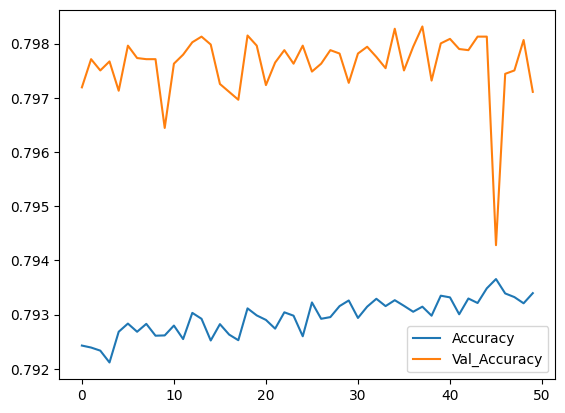

In [561]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

**Sonuç**:elimizdeki verilerle kredisini ödeyen veya ödemeyen müşteri profili çıkarıp yaklaşık yüzde 80 oranında bazı sorular sorarak doğru tahmin eden bir model çıkardık
1. Kredi başvurunuzun durumu nedir?
2. Almak istediğiniz kredi süresi ne kadar?
3. Kredi skorunuz kaç?
4. Şu anki işinizde ne kadar süredir çalışıyorsunuz?
5. Eviniz var mı yoksa kiracı mısınız?
6. Yıllık geliriniz nedir?
7. Krediyi hangi amaçla kullanmayı planlıyorsunuz?
8. Aylık borçlarınızın toplamı ne kadardır?
9. Kredi geçmişiniz ne kadar süredir var?
10. Son temerrüt durumunuzdan bu yana ne kadar zaman geçti?
11. Kaç adet açık kredi hesabınız bulunuyor?
12. Daha önce kaç adet kredi problemi yaşadınız?
13. Şu anda kredi bakiyeniz ne kadar?
14. En yüksek açık kredi limitiniz nedir?
15. Daha önce iflas yaşadınız mı? Eğer evet ise, kaç kez?
16. Daha önce vergi ihtilali yaşadınız mı? Eğer evet ise, kaç kez?